# Statistical Analysis of User Testing Results

The following data was manually entered based on the <a href="https://docs.google.com/forms/d/e/1FAIpQLSfx20_svJcdGu16vEDM1gNOzEcOnAFeu45VS_h81KKxRv83lQ/viewform" target="_blank">Google form</a> submitted by all test participants.
1. **user_testing_results:** contains the number of correct and incorrect answers for all samples.
2. **user_testing_results_6-10:** contains the number of true positive, false positive, true negative, and false negative answers. Provides a more precise insight into the last 5 users' selections, for samples 6-10.

## Test Accuracy

correct: 266
incorrect: 204
accuracy: 0.5659574468085107


<Axes: title={'center': 'Correct And Incorrect Classification Per Sample'}, xlabel='sample ids', ylabel='number of users'>

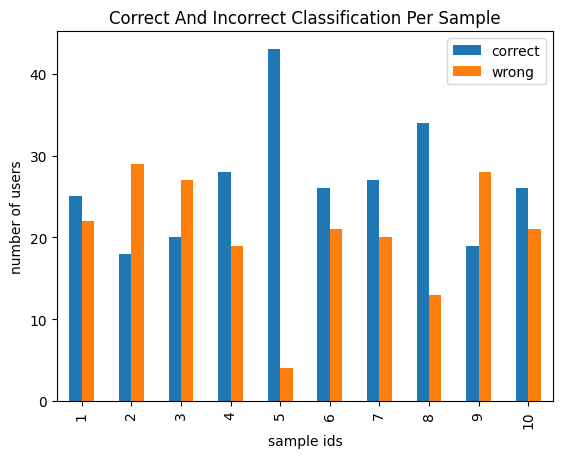

In [1]:
import pandas as pd

#load data
all_data = pd.read_csv("user_testing_results.csv")

# print stats
print("correct:", all_data["correct"].sum())
print("incorrect:", all_data["wrong"].sum())
print("accuracy:", all_data["correct"].sum()/(all_data["correct"].sum()+all_data["wrong"].sum()))

# plot data
all_data.plot.bar(
    x="id", 
    title="Correct And Incorrect Classification Per Sample", 
    xlabel="sample ids", 
    ylabel="number of users"
)

## Test Precision and Recall

In [2]:
# load data
data = pd.read_csv("user_testing_results_6-10.csv")

# calculate TP,TN,FP,FN
TP = data[(data["actual"]==1) & (data["predicted"]==1)]["n_users"].sum()
TN = data[(data["actual"]==0) & (data["predicted"]==0)]["n_users"].sum()
FP = data[(data["actual"]==0) & (data["predicted"]==1)]["n_users"].sum()
FN = data[(data["actual"]==1) & (data["predicted"]==0)]["n_users"].sum()

# print stats
print("true positives:", TP)
print("true negatives:", TN)
print("false positives:", FP)
print("false negatives:", FN)
print("------------------------------")
print("recall:", TP / (TP + FN))
print("precision:", TP / (TP + FP))

true positives: 61
true negatives: 71
false positives: 70
false negatives: 33
------------------------------
recall: 0.648936170212766
precision: 0.46564885496183206


## Easiest and Hardest Samples to Detect

### Within All Samples
By finding the difference between correct and incorrect answers, we can have an insight into the easiest and the most difficult images to detect.

In [3]:
diff = all_data["correct"] - all_data["wrong"]
# get the absolute value (dispose of the negative symbol)
diff = diff.abs()
# set index as a column, as it represents the sample number -1
diff = diff.reset_index()
diff["index"] += 1

# minimal difference between correct and incorrect
hardest = diff[diff[0]==diff[0].min()]
# maximal difference between correct and incorrect
easiest = diff[diff[0]==diff[0].max()]

# print stats
print("the easiest sample to detect: {} by margin of: {}".format(
    easiest["index"].values[0],
    easiest[0].values[0]
    ))
print("the hardest sample to detect: {} by margin of: {}".format(
    hardest["index"].values[0],
    hardest[0].values[0]
    ))

the easiest sample to detect: 5 by margin of: 39
the hardest sample to detect: 1 by margin of: 3


#### First 5 Altered user testing samples

Please note: the users were presented with the real copy and the altered copy of thess photos
![samples 6 to 10](images/samples_1-5.png)

### Within Last 6-10 Samples

In [6]:
# dalculate the difference between max and min values for each sample id
diff = data.groupby("id").max() - data.groupby("id").min()
diff = diff.reset_index()

# find the most and least difference
easiest = diff[diff["n_users"] == diff["n_users"].max()]
hardest = diff[diff["n_users"] == diff["n_users"].min()]

# print stats
print("the easiest sample to detect: {} by margin of: {}".format(
    easiest["id"].values[0],
    easiest["n_users"].values[0]
    ))
print("the hardest samples to detect: {} by margin of: {}".format(
    hardest["id"].values,
    hardest["n_users"].values[0]
    ))

the easiest sample to detect: 8 by margin of: 21
the hardest samples to detect: [ 6 10] by margin of: 5


#### Last 5 user testing samples

![samples 6 to 10](images/samples_6-10.png)